In [203]:
%matplotlib inline
from scilab import *

In [204]:
import random  
import numpy as np  
from matplotlib import pyplot as plt  

def mazeGen_BrkCir(num_rows=20, num_cols=20):  
    
    LEFT, UP, RIGHT, DOWN = 0,1,2,3
    M = np.ones((num_rows,num_cols,4), dtype=np.uint8)
    M[0,:,UP] = 0
    M[-1,:,DOWN] = 0
    M[:,0,LEFT] = 0
    M[:,-1,RIGHT] = 0

    class maze_graph_rec:
        def __init__(self, matrix):
            self.M = matrix
            num_rows,num_cols = matrix.shape[:2]
            self.vertices = [array((r,c)) for r in range(num_rows) for c in range(num_cols)]

        def edgesOf(self, v):
            neis = self.M[(*v,)]
            deltas = np.array([[0,-1],[-1,0],[0,1],[1,0]])

            return [v + d for d in deltas[neis==1]]

        def remove_edge(self, v1, v2):
            delta = (*(v2 - v1),)
            memmap = {(0,-1):0,(-1,0):1,(0,1):2,(1,0):3}
            ind = memmap[delta]
            self.M[(*v1,)][ind] = 0

            delta = (*(v1 - v2),)
            ind = memmap[delta]
            self.M[(*v2,)][ind] = 0

        @property
        def edges(self):
            def half_edges(v):
                neis = self.M[(*v,)][:2]
                deltas = np.array([[0,-1],[-1,0]])
                return [v + d for d in deltas[neis==1]]
            edges = [(v,n) for v in self.vertices for n in half_edges(v)]
            return edges

    G = maze_graph_rec(M)
    edges_in_circle = [(tuple(v1),tuple(v2)) for v1,v2 in G.edges]

    M_temp = M.copy()
    G_temp = maze_graph_rec(M_temp)

    def check_in_circle(v, G):
        neis = G.edgesOf(v)
        tv = tuple(v)
        if len(neis) == 1:
            tnei = tuple(neis[0])
            print(tv, "has one nei ", tnei)
            sucess = False
            try:
                edges_in_circle.remove((tv, tnei))
                sucess = True
            except:pass
            try:
                edges_in_circle.remove((tnei,tv))
                sucess = True
            except:pass
            
            assert(sucess)

            G.remove_edge(v, neis[0])
            print(len(G.edges), "edges in circle(graph)")
            print(len(edges_in_circle), "edges in circle(list)")
            check_in_circle(neis[0], G)

    while edges_in_circle:
        print("\n",len(edges_in_circle), "edges")
        ie = random.randint(0, len(edges_in_circle)-1)

        tv1, tv2 = edges_in_circle.pop(ie)
        print("choice edge: ",tv1,tv2)
        v1 = array(tv1)
        v2 = array(tv2)
        G.remove_edge(v1,v2)
        G_temp.remove_edge(v1,v2)

        check_in_circle(v1, G_temp)
        check_in_circle(v2, G_temp)

    M[0,0,0] = 1  
    M[num_rows-1,num_cols-1,2] = 1  

    # Generate the image for display  
    image = np.zeros((num_rows*10,num_cols*10), dtype=np.uint8)
    for row in range(0,num_rows):  
        for col in range(0,num_cols):  
            cell_data = M[row,col]  
            for i in range(10*row+2,10*row+8):  
                image[i,range(10*col+2,10*col+8)] = 255  
            if cell_data[0] == 1:   
                image[range(10*row+2,10*row+8),10*col] = 255  
                image[range(10*row+2,10*row+8),10*col+1] = 255  
            if cell_data[1] == 1:   
                image[10*row,range(10*col+2,10*col+8)] = 255  
                image[10*row+1,range(10*col+2,10*col+8)] = 255  
            if cell_data[2] == 1:   
                image[range(10*row+2,10*row+8),10*col+9] = 255  
                image[range(10*row+2,10*row+8),10*col+8] = 255  
            if cell_data[3] == 1:   
                image[10*row+9,range(10*col+2,10*col+8)] = 255  
                image[10*row+8,range(10*col+2,10*col+8)] = 255  

    import matplotlib.cm as cm  
    # Display the image  
    plt.imshow(image, cmap = cm.Greys_r, interpolation='none')  
    plt.show()
    
    return image


 40 edges
choice edge:  (0, 4) (0, 3)
(0, 4) has one nei  (1, 4)
38 edges in circle(graph)
38 edges in circle(list)

 38 edges
choice edge:  (4, 4) (4, 3)
(4, 4) has one nei  (3, 4)
36 edges in circle(graph)
36 edges in circle(list)

 36 edges
choice edge:  (2, 1) (2, 0)

 35 edges
choice edge:  (2, 3) (1, 3)

 34 edges
choice edge:  (1, 0) (0, 0)
(0, 0) has one nei  (0, 1)
32 edges in circle(graph)
32 edges in circle(list)

 32 edges
choice edge:  (4, 0) (3, 0)
(4, 0) has one nei  (4, 1)
30 edges in circle(graph)
30 edges in circle(list)

 30 edges
choice edge:  (4, 3) (3, 3)
(4, 3) has one nei  (4, 2)
28 edges in circle(graph)
28 edges in circle(list)

 28 edges
choice edge:  (1, 4) (1, 3)
(1, 4) has one nei  (2, 4)
26 edges in circle(graph)
26 edges in circle(list)

 26 edges
choice edge:  (3, 2) (3, 1)

 25 edges
choice edge:  (3, 1) (2, 1)

 24 edges
choice edge:  (4, 2) (4, 1)
(4, 2) has one nei  (3, 2)
22 edges in circle(graph)
22 edges in circle(list)
(4, 1) has one nei  (3, 1

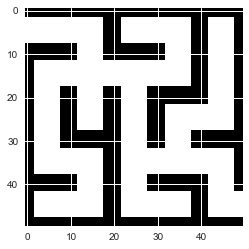

In [205]:
mazeGen_BrkCir(5,5);

In [179]:
_176

NameError: name '_176' is not defined

In [206]:
G.edgesOf(v1)

[array([11,  1])]

In [207]:
a = 1

In [208]:
random.randint(0,2)

2

In [242]:
vers_in_circle.pop?

In [236]:
G.edgesOf(v)

[array([7, 2]), array([6, 3]), array([7, 4]), array([8, 3])]

In [238]:
v,e

((7, 3), array([6, 3]))

In [229]:
len(G.edgesOf((1,1)))

3

In [237]:
G.remove_edge((1,0),(1,1))

TypeError: unsupported operand type(s) for -: 'tuple' and 'tuple'

In [61]:
import random  
import numpy as np  
from matplotlib import pyplot as plt  
import matplotlib.cm as cm  
def mazeGen_Prim(num_rows=20, num_cols=20):  

    # The array M is going to hold the array information for each cell.  
    # The first four coordinates tell if walls exist on those sides   
    # and the fifth indicates if the cell has been visited in the search.  
    # M(LEFT, UP, RIGHT, DOWN, CHECK_IF_VISITED)  
    M = np.zeros((num_rows,num_cols,5), dtype=np.uint8)  

    # The array image is going to be the output image to display  
    image = np.zeros((num_rows*10,num_cols*10), dtype=np.uint8)  

    # Set starting row and column  
    r = 0  
    c = 0  
    history = [(r,c)] # The history is the stack of visited locations  

    # Trace a path though the cells of the maze and open walls along the path.  
    # We do this with a while loop, repeating the loop until there is no history,   
    # which would mean we backtracked to the initial start.  
    while history:   
        #random choose a candidata cell from the cell set histroy  
        r,c = random.choice(history)  
        M[r,c,4] = 1 # designate this location as visited  
        history.remove((r,c))  
        check = []  
        # If the randomly chosen cell has multiple edges   
        # that connect it to the existing maze,   
        if c > 0:  
            if M[r,c-1,4] == 1:  
                check.append('L')  
            elif M[r,c-1,4] == 0:  
                history.append((r,c-1))  
                M[r,c-1,4] = 2  
        if r > 0:  
            if M[r-1,c,4] == 1:   
                check.append('U')   
            elif M[r-1,c,4] == 0:  
                history.append((r-1,c))  
                M[r-1,c,4] = 2  
        if c < num_cols-1:  
            if M[r,c+1,4] == 1:   
                check.append('R')  
            elif M[r,c+1,4] == 0:  
                history.append((r,c+1))  
                M[r,c+1,4] = 2   
        if r < num_rows-1:  
            if M[r+1,c,4] == 1:   
                check.append('D')   
            elif  M[r+1,c,4] == 0:  
                history.append((r+1,c))  
                M[r+1,c,4] = 2  

        # select one of these edges at random.  
        if len(check):  
            move_direction = random.choice(check)  
            if move_direction == 'L':  
                M[r,c,0] = 1  
                c = c-1  
                M[r,c,2] = 1  
            if move_direction == 'U':  
                M[r,c,1] = 1  
                r = r-1  
                M[r,c,3] = 1  
            if move_direction == 'R':  
                M[r,c,2] = 1  
                c = c+1  
                M[r,c,0] = 1  
            if move_direction == 'D':  
                M[r,c,3] = 1  
                r = r+1  
                M[r,c,1] = 1  

    # Open the walls at the start and finish  
    M[0,0,0] = 1  
    M[num_rows-1,num_cols-1,2] = 1  

    # Generate the image for display  
    for row in range(0,num_rows):  
        for col in range(0,num_cols):  
            cell_data = M[row,col]  
            for i in range(10*row+2,10*row+8):  
                image[i,range(10*col+2,10*col+8)] = 255  
            if cell_data[0] == 1:   
                image[range(10*row+2,10*row+8),10*col] = 255  
                image[range(10*row+2,10*row+8),10*col+1] = 255  
            if cell_data[1] == 1:   
                image[10*row,range(10*col+2,10*col+8)] = 255  
                image[10*row+1,range(10*col+2,10*col+8)] = 255  
            if cell_data[2] == 1:   
                image[range(10*row+2,10*row+8),10*col+9] = 255  
                image[range(10*row+2,10*row+8),10*col+8] = 255  
            if cell_data[3] == 1:   
                image[10*row+9,range(10*col+2,10*col+8)] = 255  
                image[10*row+8,range(10*col+2,10*col+8)] = 255  


    # Display the image  
    plt.imshow(image, cmap = cm.Greys_r, interpolation='none')  
    plt.show()
    return image

In [62]:
# Code by jollysoul  
  
import random  
import numpy as np  
from matplotlib import pyplot as plt  
import matplotlib.cm as cm  
def mazeGen_ReBT(num_rows=20, num_cols=20):        
  
    # The array M is going to hold the array information for each cell.  
    # The first four coordinates tell if walls exist on those sides   
    # and the fifth indicates if the cell has been visited in the search.  
    # M(LEFT, UP, RIGHT, DOWN, CHECK_IF_VISITED)  
    M = np.zeros((num_rows,num_cols,5), dtype=np.uint8)  
      
    # The array image is going to be the output image to display  
    image = np.zeros((num_rows*10,num_cols*10), dtype=np.uint8)  
      
    # Set starting row and column  
    r = 0  
    c = 0  
    history = [(r,c)] # The history is the stack of visited locations  
      
    # Trace a path though the cells of the maze and open walls along the path.  
    # We do this with a while loop, repeating the loop until there is no history,   
    # which would mean we backtracked to the initial start.  
    while history:   
        M[r,c,4] = 1 # designate this location as visited  
        # check if the adjacent cells are valid for moving to  
        check = []  
        if c > 0 and M[r,c-1,4] == 0:  
            check.append('L')    
        if r > 0 and M[r-1,c,4] == 0:  
            check.append('U')  
        if c < num_cols-1 and M[r,c+1,4] == 0:  
            check.append('R')  
        if r < num_rows-1 and M[r+1,c,4] == 0:  
            check.append('D')      
          
        if len(check): # If there is a valid cell to move to.  
            # Mark the walls between cells as open if we move  
            history.append([r,c])  
            move_direction = random.choice(check)  
            if move_direction == 'L':  
                M[r,c,0] = 1  
                c = c-1  
                M[r,c,2] = 1  
            if move_direction == 'U':  
                M[r,c,1] = 1  
                r = r-1  
                M[r,c,3] = 1  
            if move_direction == 'R':  
                M[r,c,2] = 1  
                c = c+1  
                M[r,c,0] = 1  
            if move_direction == 'D':  
                M[r,c,3] = 1  
                r = r+1  
                M[r,c,1] = 1  
        else: # If there are no valid cells to move to.  
        # retrace one step back in history if no move is possible  
            r,c = history.pop()  
          
               
    # Open the walls at the start and finish  
    M[0,0,0] = 1  
    M[num_rows-1,num_cols-1,2] = 1  
          
    # Generate the image for display  
    for row in range(0,num_rows):  
        for col in range(0,num_cols):  
            cell_data = M[row,col]  
            for i in range(10*row+2,10*row+8):  
                image[i,range(10*col+2,10*col+8)] = 255  
            if cell_data[0] == 1:   
                image[range(10*row+2,10*row+8),10*col] = 255  
                image[range(10*row+2,10*row+8),10*col+1] = 255  
            if cell_data[1] == 1:   
                image[10*row,range(10*col+2,10*col+8)] = 255  
                image[10*row+1,range(10*col+2,10*col+8)] = 255  
            if cell_data[2] == 1:   
                image[range(10*row+2,10*row+8),10*col+9] = 255  
                image[range(10*row+2,10*row+8),10*col+8] = 255  
            if cell_data[3] == 1:   
                image[10*row+9,range(10*col+2,10*col+8)] = 255  
                image[10*row+8,range(10*col+2,10*col+8)] = 255  
              
      
    # Display the image  
    plt.imshow(image, cmap = cm.Greys_r, interpolation='none')  
    plt.show()
    
    return image

In [63]:
# Code by jollysoul  
  
import random  
import numpy as np  
from matplotlib import pyplot as plt  
import matplotlib.cm as cm  
  
#这个函数将当前区域划分为四个小区域，并随机的在三个区域挖洞，  
#让四个区域彼此联通，分隔与挖洞点都是随机生成的。  
def Recursive_division(r1, r2, c1, c2, M, image):  
    if r1 < r2 and c1 < c2:  
        rm = random.randint(r1, r2-1)  
        cm = random.randint(c1, c2-1)  
        cd1 = random.randint(c1,cm)  
        cd2 = random.randint(cm+1,c2)  
        rd1 = random.randint(r1,rm)  
        rd2 = random.randint(rm+1,r2)  
        d = random.randint(1,4)  
        if d == 1:  
            M[rd2, cm, 2] = 1  
            M[rd2, cm+1, 0] = 1  
            M[rm, cd1, 3] = 1  
            M[rm+1, cd1, 1] = 1  
            M[rm, cd2, 3] = 1  
            M[rm+1, cd2, 1] = 1  
        elif d == 2:  
            M[rd1, cm, 2] = 1  
            M[rd1, cm+1, 0] = 1  
            M[rm, cd1, 3] = 1  
            M[rm+1, cd1, 1] = 1  
            M[rm, cd2, 3] = 1  
            M[rm+1, cd2, 1] = 1  
        elif d == 3:  
            M[rd1, cm, 2] = 1  
            M[rd1, cm+1, 0] = 1  
            M[rd2, cm, 2] = 1  
            M[rd2, cm+1, 0] = 1  
            M[rm, cd2, 3] = 1  
            M[rm+1, cd2, 1] = 1  
        elif d == 4:  
            M[rd1, cm, 2] = 1  
            M[rd1, cm+1, 0] = 1  
            M[rd2, cm, 2] = 1  
            M[rd2, cm+1, 0] = 1  
            M[rm, cd1, 3] = 1  
            M[rm+1, cd1, 1] = 1  
  
        Recursive_division(r1, rm, c1, cm, M, image)  
        Recursive_division(r1, rm, cm+1, c2, M, image)  
        Recursive_division(rm+1, r2, cm+1, c2, M, image)  
        Recursive_division(rm+1, r2, c1, cm, M, image)  
  
    elif r1 < r2:  
        rm = random.randint(r1, r2-1)  
        M[rm,c1,3] = 1  
        M[rm+1,c1,1] = 1  
        Recursive_division(r1, rm, c1, c1, M, image)  
        Recursive_division(rm+1, r2, c1, c1, M, image)  
    elif c1 < c2:  
        cm = random.randint(c1,c2-1)  
        M[r1,cm,2] = 1  
        M[r1,cm+1,0] = 1  
        Recursive_division(r1, r1, c1, cm, M, image)  
        Recursive_division(r1, r1, cm+1, c2, M, image)  

        
        
def mazeGen_ReD(num_rows=20, num_cols=20):  
    
    r1 = 0  
    r2 = num_rows-1  
    c1 = 0  
    c2 = num_cols-1  

    # The array M is going to hold the array information for each cell.  
    # The first four coordinates tell if walls exist on those sides   
    # and the fifth indicates if the cell has been visited in the search.  
    # M(LEFT, UP, RIGHT, DOWN, CHECK_IF_VISITED)  
    M = np.zeros((num_rows,num_cols,5), dtype=np.uint8)  

    # The array image is going to be the output image to display  
    image = np.zeros((num_rows*10,num_cols*10), dtype=np.uint8)  

    Recursive_division(r1, r2, c1, c2, M, image)    

    # Open the walls at the start and finish  
    M[0,0,0] = 1  
    M[num_rows-1,num_cols-1,2] = 1  

    # Generate the image for display  
    for row in range(0,num_rows):  
        for col in range(0,num_cols):  
            cell_data = M[row,col]  
            for i in range(10*row+2,10*row+8):  
                image[i,range(10*col+2,10*col+8)] = 255  
            if cell_data[0] == 1:   
                image[range(10*row+2,10*row+8),10*col] = 255  
                image[range(10*row+2,10*row+8),10*col+1] = 255  
            if cell_data[1] == 1:   
                image[10*row,range(10*col+2,10*col+8)] = 255  
                image[10*row+1,range(10*col+2,10*col+8)] = 255  
            if cell_data[2] == 1:   
                image[range(10*row+2,10*row+8),10*col+9] = 255  
                image[range(10*row+2,10*row+8),10*col+8] = 255  
            if cell_data[3] == 1:   
                image[10*row+9,range(10*col+2,10*col+8)] = 255  
                image[10*row+8,range(10*col+2,10*col+8)] = 255  


    # Display the image  
    plt.imshow(image, cmap = cm.Greys_r, interpolation='none')  
    plt.show()
    
    return image

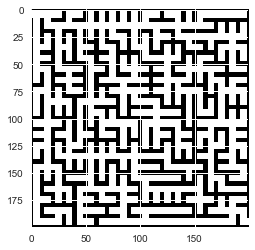

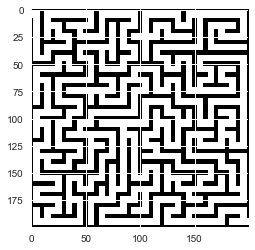

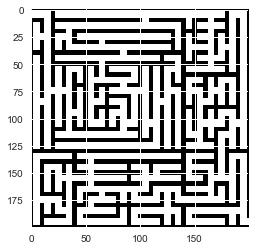

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [255, 255, 255, ..., 255,   0,   0],
       ..., 
       [  0,   0, 255, ..., 255, 255, 255],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [8]:
mazeGen_Prim()
mazeGen_ReBT()
mazeGen_ReD()

In [64]:
def standardize(im):
    sim = np.roll(im, 1, axis=0)
    mask = (sim == im).all(axis=1)
    mask[0] = False
    im = im[~mask]
    
    sim = np.roll(im, 1, axis=1)
    mask = (sim == im).all(axis=0)
    mask[0] = False
    im = im[:,~mask]
    return im

In [65]:
def neiPairsOf(idim, trans=-1, shift=None):

    shift = shift or (lambda im,pairs:[np.roll(im,(d,r),axis=(0,1)) for d,r in pairs])
    
    def toNeiPairs(a, b):
        a = a.reshape(-1, 1)
        b = b.reshape(-1, 1)
        pairs = np.hstack([a,b])
        pairs = pairs[pairs[:,0] != trans]
        pairs = pairs[pairs[:,1] != trans]
        return pairs
    
    neiPairs = [toNeiPairs(idim, neimage) for neimage in shift(idim, [(1,0),(0,1)])]
        
    return np.vstack(neiPairs)

def to_id_image(im, transOld=0, transNew=-1):
    idim = np.arange(im.ravel().shape[0]).reshape(im.shape)
    idim[im==transOld] = transNew
    return idim

def toCoords(ids, shape):
    ids = array(ids)
    m,n = shape
    r = ids // n
    c = ids % n
    return np.column_stack([r,c])

def toIDs(coords, shape):
    coords = array(coords)
    m, n = shape
    r, c = coords.T
    if isinstance(r, np.ndarray):
        r[r<0] += m
        c[c<0] += n
    else:
        r = r if r>=0 else r + m
        c = c if c>=0 else c + n
        
    return r * n + c

def plotGroup(im, group):
    plt.imshow(im)
    
    yx = toCoords(list(group), im.shape)
    plot(yx[:,1],yx[:,0],'r.')
    plt.axis("off")
    plt.show()

In [66]:
def shift_zeropadding(arr, disp_pairs):
    h,w = arr.shape
    paded = np.zeros((h+2,w+2), dtype=int)
    paded[1:-1,1:-1] = arr
    
    shift = lambda d,r: paded[-d+1:-d+1+h, -r+1:-r+1+w]
    return [shift(d,r) for d,r in disp_pairs]

In [67]:
from graph import graph

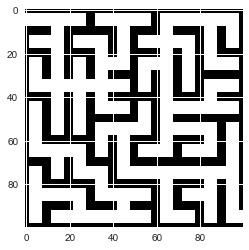

In [80]:
mazeGen = mazeGen_BrkCir
maze = mazeGen(10,10)

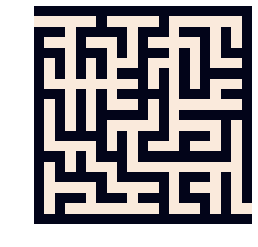

In [81]:
stdmaze = standardize(maze)
idim = to_id_image(stdmaze)
nepairs = neiPairsOf(idim, shift=shift_zeropadding)
way = graph(nepairs).serch(toIDs((1,0), stdmaze.shape), toIDs((-2,-1), stdmaze.shape))
plotGroup(stdmaze, way)

In [82]:
len(graph(nepairs).equivalence)

4

In [232]:
maze.shape

(100, 100)

In [78]:
plt.imsave("maze_rebt_80.png", maze)

(-0.5, 60.5, 60.5, -0.5)

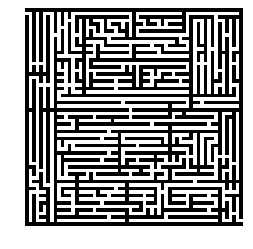

In [16]:
plt.imshow(stdmaze, cmap = cm.Greys_r, interpolation='none')
plt.axis("off")

In [17]:
nepairs.shape

(1801, 2)

In [97]:
am80 = plt.imread(r"C:\Users\momos\Desktop\am80.png")

In [98]:
am80.shape

(545, 1040, 4)

In [121]:
mask = am80[:,:,-1]!=0

In [122]:
am80[mask].reshape()

TypeError: reshape() takes exactly 1 argument (0 given)

In [123]:
def standardizepng(im):
    mask = (im[:,:,-1]==0).all(axis=1)
    im = im[~mask]
    
    mask = (im[:,:,-1]==0).all(axis=0)
    im = im[:,~mask]
#     sim = np.roll(im, 1, axis=0)
#     mask = (sim == im).all(axis=1)
#     mask[0] = False
#     im = im[~mask]
    
#     sim = np.roll(im, 1, axis=1)
#     mask = (sim == im).all(axis=0)
#     mask[0] = False
#     im = im[:,~mask]
    return im

In [124]:
standardize(am80).shape

(545, 1040, 4)

In [227]:
a = array([0,1,0,1, 0,0,0,1, 0,0,0,1, 0,0,0,0]).reshape(4,4)

In [228]:
a

array([[0, 1, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 0]])

In [200]:
a@a

array([[0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0]])

In [201]:
a@a@a

array([[0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0]])

In [202]:
a@a@a@a

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

In [209]:
from scipy.sparse.csgraph import floyd_warshall

In [218]:
floyd_warshall(a, directed=False, unweighted=True)

array([[  0.,   1.,  inf,   1.],
       [  1.,   0.,  inf,   1.],
       [ inf,  inf,   0.,  inf],
       [  1.,   1.,  inf,   0.]])

In [221]:
np.isinf(_218).any()

True

In [223]:
def isconnected(arr):
    dist = floyd_warshall(arr, directed=False, unweighted=True)
    return not np.isinf(dist).any()

In [231]:
isconnected(a)

True